In [130]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import pairwise_distances
from itertools import combinations
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [131]:
dados = pd.read_csv('creditcustomersegmentation.csv')
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [132]:
dados = dados.drop(['CUST_ID', 'TENURE'], axis=1)
dados

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [133]:
missing = dados.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [134]:
dados.fillna(dados.median(), inplace=True)
missing = dados.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

Qual modelo de normalização usar? 

Função StandardScaler() --> Útil para dados que estão em diferentes escalas e possuem diferentes unidades de medida.

Função Normalizer() --> Útil para dados que possuem escalas similares, porém possuem unidades de medidas diferentes.

Nesse caso, deve utilizar o Normalizer().

In [135]:
values = Normalizer().fit_transform(dados.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [136]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
#Forçando o algoritmo a entregar 10x os mesmos valores
#Algoritmo itera 300x
y_pred = kmeans.fit_predict(values)
y_pred

array([1, 3, 1, ..., 1, 1, 4])

In [137]:
y_pred = pd.DataFrame(y_pred)
dados['Cluster'] = y_pred
dados['Cluster']

0       1
1       3
2       1
3       1
4       0
       ..
8945    1
8946    1
8947    1
8948    1
8949    4
Name: Cluster, Length: 8950, dtype: int32

Etapa de validação dos clusters.

Critérios de Validação:

Compactação --> Quão próximos estão os pontos em um mesmo cluster.

Separação --> Qual bem separados os pontos de clusters diferentes estão.



Coeficiente do Silhouette 

s = (b - a)/ (max(a, b))

a --> Distância média entre um ponto específico de um cluster, em relação aos outros pontos do mesmo cluster.

b --> Distância média entro o ponto e todos os outros pontos do cluster mais próximo.






In [138]:
#Métrica do Silhoutette
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
silhouette

0.34861955528487404

Coeficiente de Davies-Bouldin

DB = 1/K * SOMA de 1 a K (máx i!=j --> Rij)

Rij --> Medidas de similaridade entre dois clusters i e j

Rij = (Si + Sj) / dij

S --> Distância média entre cada ponto do clusters e o seu centroide.

d --> Distância entre centroides dos clusters.




In [139]:
#Métrica Davies-Bouldin
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.1527848335300395

In [140]:
#Métrica Calinski
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3422.8431275922103

In [141]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [142]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.440519908274


In [143]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3645268652444429 1.0758562764119166 3431.788779759367


In [144]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3514185339400365 1.116602033620436 3019.1810861891186


Devido o contexto do problema, deve ser escolhido 5 clusters, pois com n_clusters = 5, temos o maior número para esse indicador, que é mais relevante.

In [145]:
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03959452622511254 3.5439393208335703 302.1245174704914
0.3645268652444429 1.0758562764119166 3431.788779759367


In [146]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36874828236865986 1.0591408006918441 1204.05579455549
0.3534637440687495 1.1415991529976266 1194.940686311646
0.36704188760608253 1.0984932613776761 1167.5309516803998


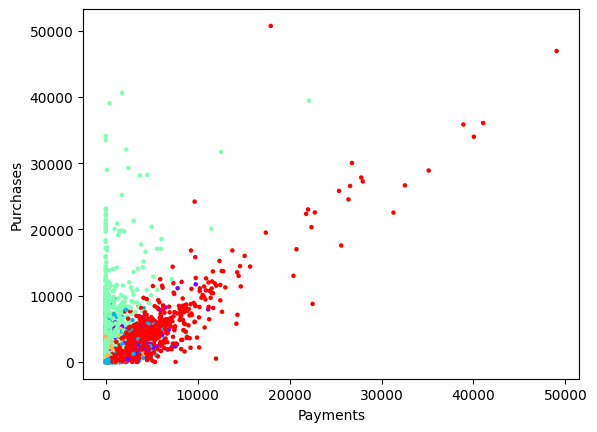

In [147]:
plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Payments')
plt.ylabel('Purchases')
plt.show()

In [148]:
dados.groupby('Cluster').describe()

BALANCE                                                     \
          count         mean          std         min          25%   
Cluster                                                              
0        1826.0  2948.485976  2565.219759  114.523682  1216.669637   
1        3314.0   488.663699   936.541027    0.000000    24.068413   
2        1001.0  1748.854674  1987.975020    0.000000   486.170360   
3        1315.0  2719.616192  2230.337145    1.691842  1035.647960   
4        1494.0  1118.998658  1627.007380    0.000000   212.520398   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
Cluster                                                                       
0        1843.249845  4020.115976  18495.558550            1826.0  0.996862   
1          85.839864   448.803579   9630.367575            3314.0  0.780906   
2        1060.422892  2241.092286  14581.459140            1001.0  0.858535   
3        2080.312991  3782.283750  12856.152510            1315.0  0.906890   
4         543.237203  1337.212684  19043.138560            1494.0  0.931343   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
Cluster  ...                                                             
0        ...      1966.828480  76406.207520           1826.0  0.001062   
1        ...       260.044404   2420.224884           3314.0  0.245025   
2        ...       931.105425  21235.065300           1001.0  0.129974   
3        ...      1164.174894   8644.138069           1315.0  0.007450   
4        ...       531.787024  18621.013310           1494.0  0.282392   

                                                           
              std  min  25%       50%       75%       max  
Cluster                                                    
0        0.013396  0.0  0.0  0.000000  0.000000  0.416667  
1        0.345912  0.0  0.0  0.000000  0.440476  1.000000  
2        0.198876  0.0  0.0  0.083333  0.166667  1.000000  
3        0.041141  0.0  0.0  0.000000  0.000000  0.600000  
4        0.369194  0.0  0.0  0.083333  0.567461  1.000000  

[5 rows x 128 columns]

Agora deve-se analisar a variância dos centróides para certos atributos. 

Vamos pegar 5 clusters e um atritbuto, e vammos ver como esse valor se comporta dentro dos 5 clusters

In [149]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.34458796e-01 3.07549717e-04 9.40114466e-02 4.50698658e-02
  4.90567209e-02 8.40367641e-02 1.03565946e-04 3.28910602e-05
  7.70160921e-05 3.86114997e-05 6.69549891e-04 2.24131113e-03
  6.47520641e-01 2.00021597e-01 3.11484737e-01 2.85732278e-07]
 [7.41303920e-02 2.30630726e-04 1.22681345e-01 4.91484649e-02
  7.36334745e-02 2.01830147e-02 1.72157069e-04 3.41158968e-05
  1.39440574e-04 7.55877350e-06 1.18642135e-04 2.87280779e-03
  9.43131166e-01 1.54910352e-01 5.70748008e-02 7.55241301e-05]
 [2.27283461e-01 2.12919599e-04 6.90552841e-02 3.82103280e-02
  3.08505405e-02 3.64415621e-01 5.84848743e-05 2.24756747e-05
  3.97948056e-05 5.90776324e-05 1.43098394e-03 1.30916105e-03
  5.19057140e-01 6.31517578e-01 1.13827521e-01 3.10899781e-05]
 [3.92487569e-01 2.21860804e-04 4.09098804e-02 2.41007933e-02
  1.68131725e-02 4.69520034e-01 4.57363938e-05 1.59983052e-05
  3.02438944e-05 7.73988118e-05 1.73779582e-03 7.90105978e-04
  7.16382232e-01 1.49404205e-01 1.32351222e-01 2.04165312e-06]
 [1.

Precisamos encontrar os atributos que mais variam entre clusters.

Para assim encontrarmos especificidades entre os cluster.

In [150]:
#Calculando a variância em cada um dos atributos
max = len(centroids[0])
for i in range(max):
    print(dados.columns.values[i], '\n{:.4f}'.format(centroids[:, i].var()))

BALANCE 
0.0276
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0219
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0037
CASH_ADVANCE 
0.0350
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0210
PAYMENTS 
0.0348
MINIMUM_PAYMENTS 
0.0079
PRC_FULL_PAYMENT 
0.0000


## **Deve-se escolher para análise de cluster, as variáveis que possuem maiores variações, são elas**

*BALANCE: 0.0224*

*PURCHASE: 0.0197*

*CASH_ADVANCE: 0.02269*

*MINIMUM_PAYMENTS: 0.0546*

*CREDIT_LIMIT: 0.0360*

*PAYMENTS: 0.0279*

In [151]:
colunas = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
description = dados.groupby('Cluster')[colunas]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
Cluster,,,,,,
0,2948.485976,559.173549,573.536777,3731.516977,1051.072688,1826
1,488.663699,640.435208,125.939951,5178.016526,827.232273,3314
2,1748.854674,531.250120,3064.439069,3914.956256,4961.223005,1001
3,2719.616192,251.530144,3004.448265,4782.091255,1008.915227,1315
4,1118.998658,3328.438133,186.010928,4044.718977,3050.885706,1494


In [152]:
dados.groupby('Cluster')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1826.0,0.001062,0.013396,0.0,0.0,0.000000,0.000000,0.416667
1,3314.0,0.245025,0.345912,0.0,0.0,0.000000,0.440476,1.000000
2,1001.0,0.129974,0.198876,0.0,0.0,0.083333,0.166667,1.000000
3,1315.0,0.007450,0.041141,0.0,0.0,0.000000,0.000000,0.600000
4,1494.0,0.282392,0.369194,0.0,0.0,0.083333,0.567461,1.000000


# *Análise de Clusters*

*Agora, é importante que haja não só o conhecimento em Tech, mas também, o conhecimento de negócios financeiros aplicados ao Marketing. Para que assim, possa ser entendido o comportamento dos clientes do banco e o Teste A/B e estratégia de Marketing sejam aplicados*

**Cluster 0: Clientes que gastam muito com saques. Pagadores medianos.**

**Cluster 1: Clientes que gastam pouco. Possuem o maior limite. São bons pagadores. Maior número de clientes.**

**Cluster 2: Clientes com menor limite. Não são bons pagadores. Menor quantidade de clientes.**

**Cluster 3: Clientes que mais gastam, com foco em saque. São os piores pagadores. Boa quantidade de clientes.**

**Cluster 4: Clientes que gastam muito com compras. Melhores pagadores.**

*Cluster 0: Cliente Padrão --> Gastam uma certa quantidade e pagam de uma forma mediana.*

*Cluster 1: Cliente Premium --> Poder aquisitivo alto, porém não realizam muitas compras.*

*Cluster 2: Clientes Ruins --> Não possuem limites altos por quê não pagam seus cartões.*

*Cluster 3: Clientes Ruins --> Conseguem sacar, porém atrasam o pagamento.*

*Cluster 4: Clientes Premium --> Realizam compras e pagam, pode-se dizer que possuem poder aquisitivo alto.*

## **Síntese:**

Com base na análise decide-se trabalhar uma estratégia de marketing em cima do Cluster 1.

Vai ser utilizado o Teste AB, onde irá ser separado dois grupos: Controle e Teste.

Controle --> Não irá ser submetido ao teste
Teste --> Será testado.

Será validado com o tempo.

Caso o resultado do objetivo seja o mesmo para os dois, talvez a estrátegia de mkt não seja tão efetiva

## **Principal Component Analysis**

In [153]:
colunas = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
dados_number = dados[colunas]

In [154]:
#Padronização

number_columns = dados_number.columns
standard = StandardScaler()
dados_number = standard.fit_transform(dados_number)
df_dados_number = pd.DataFrame(dados_number, columns=number_columns)

In [155]:
from sklearn.decomposition import PCA
#Construindo PCA com todas as variáveis numéricas
n_fatores = df_dados_number.shape[1]
pca = PCA(n_components=n_fatores)
pca.fit(df_dados_number)
components = pca.components_
components

array([[ 4.62954114e-01,  3.67149293e-01,  3.97939158e-01,
         4.82034470e-01,  5.10060860e-01],
       [-3.67661978e-01,  6.96276881e-01, -5.53931375e-01,
        -6.10838538e-03,  2.70454977e-01],
       [-3.88970302e-01, -6.50193923e-04,  5.09550736e-01,
        -5.79307831e-01,  5.03450260e-01],
       [ 6.75064081e-01,  2.94464726e-01, -1.23500291e-01,
        -6.56222407e-01, -1.08161185e-01],
       [ 2.08539561e-01, -5.41931734e-01, -5.09813872e-01,
        -3.71489625e-02,  6.33664752e-01]])

In [156]:
explaned_variance_ratio = pca.explained_variance_ratio_
print('Autovetores:', explaned_variance_ratio)
fatores = [f'F{i+1}' for i in range(n_fatores)]

Autovetores: [0.49590592 0.23528644 0.14462187 0.08400221 0.04018356]


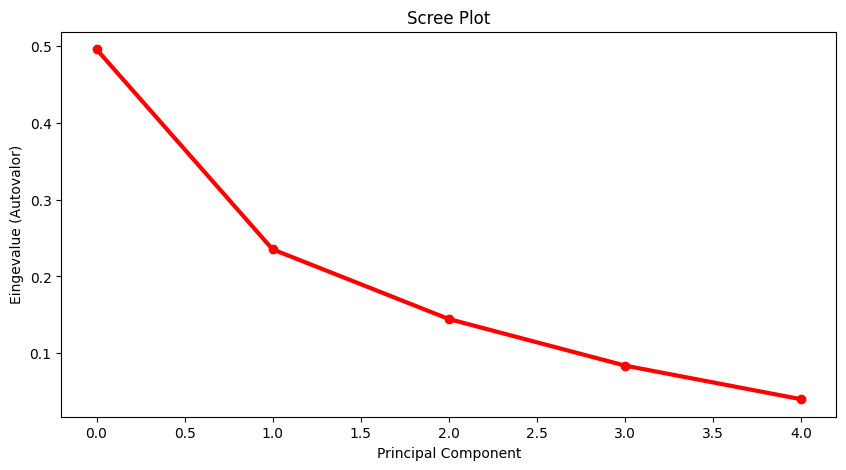

In [157]:
fig = plt.figure(figsize= (10, 5))
plt.plot(explaned_variance_ratio, 'ro-', linewidth=3)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eingevalue (Autovalor)')
plt.show()

In [158]:
df_components = pd.DataFrame(components, columns=number_columns, index = [f'Autovetor {i+1}' for i in range(n_fatores)])
df_components

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
Autovetor 1,0.462954,0.367149,0.397939,0.482034,0.510061
Autovetor 2,-0.367662,0.696277,-0.553931,-0.006108,0.270455
Autovetor 3,-0.388970,-0.000650,0.509551,-0.579308,0.503450
Autovetor 4,0.675064,0.294465,-0.123500,-0.656222,-0.108161
Autovetor 5,0.208540,-0.541932,-0.509814,-0.037149,0.633665


Variância Acumulada: [0.5  0.73 0.88 0.96 1.  ]


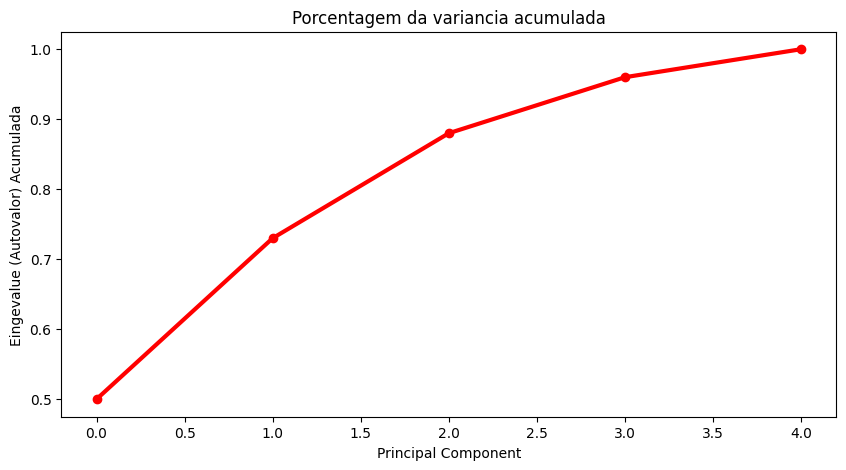

In [159]:
variancia_acumulada = [sum(explaned_variance_ratio[0:i+1]) for i in range(n_fatores)]
variancia_acumulada = np.round(variancia_acumulada, 2)
print('Variância Acumulada:', variancia_acumulada) #Autovalores acumulados


fig = plt.figure(figsize= (10, 5))
plt.plot(variancia_acumulada, 'ro-', linewidth=3)
plt.title('Porcentagem da variancia acumulada')
plt.xlabel('Principal Component')
plt.ylabel('Eingevalue (Autovalor) Acumulada')
plt.show()

In [160]:
#pca.explanded_variance_ --> Representa a quantidade de variáveis por cada um dos fatores.
#O valor mais exato pode ser explicado, multplicando: pca.explaned_variance_ratio pela quantidade de fatores.
autovalores = pca.explained_variance_ratio_ * n_fatores
print('proximação da Quantidade de Variáveis por cada um dos fatores:', autovalores)
#Se realizar a soma, o segundo método é oq mais se aproxima de 5.

proximação da Quantidade de Variáveis por cada um dos fatores: [2.47952961 1.17643219 0.72310937 0.42001104 0.20091778]


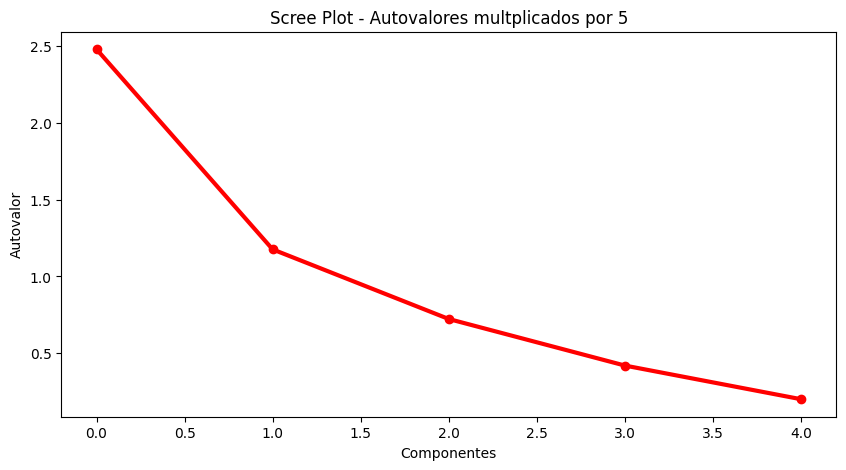

In [161]:
fatores_selecionados = ['Fator selecionado' if autovalor > 1 else 'Fator não selecionado' for autovalor in autovalores]

fig = plt.figure(figsize= (10, 5))
plt.plot(autovalores, 'ro-', linewidth=3)
plt.title('Scree Plot - Autovalores multplicados por 5')
plt.xlabel('Componentes')
plt.ylabel('Autovalor')
plt.show()

In [162]:
#Raiz dos autovalores
raiz_autovalores = np.sqrt(autovalores)
raiz_autovalores

array([1.57465222, 1.08463459, 0.85035838, 0.64808259, 0.44823853])

In [163]:
#Cargas Fatoriais
cargas_fatoriais = pd.DataFrame(components.T * raiz_autovalores, columns=fatores, index=number_columns)
cargas_fatoriais

,F1,F2,F3,F4,F5
BALANCE,0.728992,-0.398779,-0.330764,0.437497,0.093475
PURCHASES,0.578132,0.755206,-0.000553,0.190837,-0.242915
CASH_ADVANCE,0.626616,-0.600813,0.433301,-0.080038,-0.228518
CREDIT_LIMIT,0.759037,-0.006625,-0.492619,-0.425286,-0.016652
PAYMENTS,0.803168,0.293345,0.428113,-0.070097,0.284033


C:\Users\leona\AppData\Local\Temp\ipykernel_5520\4174989700.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(lista[i], (cargas_fatoriais['F1'][i], cargas_fatoriais['F2'][i]))


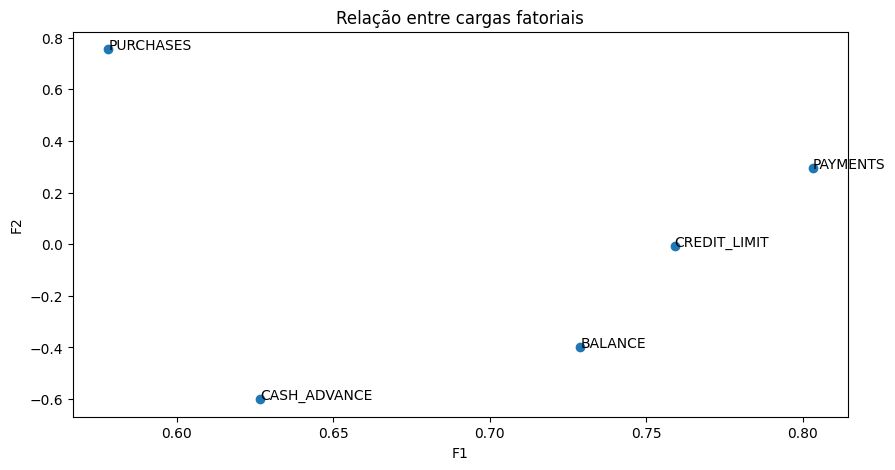

In [164]:
lista = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
    
fig = plt.figure(figsize=(10,5))
plt.scatter(x=cargas_fatoriais['F1'], y=cargas_fatoriais['F2'], )
for i in range(len(cargas_fatoriais['F1'])):
    plt.annotate(lista[i], (cargas_fatoriais['F1'][i], cargas_fatoriais['F2'][i]))
plt.title('Relação entre cargas fatoriais')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

## *Reduzindo a dimensionalidade no método ensinado na USP*

In [165]:
pca = PCA(n_components=3)
pca.fit(df_dados_number)
components_reduzidas= pca.components_
components_reduzidas

array([[ 4.62954114e-01,  3.67149293e-01,  3.97939158e-01,
         4.82034470e-01,  5.10060860e-01],
       [-3.67661978e-01,  6.96276881e-01, -5.53931375e-01,
        -6.10838538e-03,  2.70454977e-01],
       [-3.88970302e-01, -6.50193923e-04,  5.09550736e-01,
        -5.79307831e-01,  5.03450260e-01]])

In [166]:
components_scores = []
for i in range(3):
    scores = pca.transform(df_dados_number)[:,i]
    components_scores.append(scores)

components_scores = pd.DataFrame(components_scores).T
print(components_scores)

             0         1         2
0    -1.413378  0.094645  0.337188
1     1.978327 -1.842401  1.035077
2     0.184165 -0.089642 -1.083496
3     0.054070  0.180769 -0.987072
4    -1.143783 -0.024263  0.243072
...        ...       ...       ...
8945 -1.360693  0.172186  0.360975
8946 -1.370001  0.172078  0.354064
8947 -1.430087  0.102445  0.319482
8948 -1.521478  0.045641  0.404881
8949 -1.141924  0.314383  0.249791

[8950 rows x 3 columns]


In [167]:
dados['scorescp1'] = components_scores[0]
dados['scorescp2'] = components_scores[1]
dados['scorescp3'] = components_scores[2]

In [168]:
dados['Ranking'] = dados['scorescp1'] * explaned_variance_ratio[0]
dados

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Cluster,scorescp1,scorescp2,scorescp3,Ranking
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,1,-1.413378,0.094645,0.337188,-0.700903
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,3,1.978327,-1.842401,1.035077,0.981064
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,1,0.184165,-0.089642,-1.083496,0.091329
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,312.343947,0.000000,1,0.054070,0.180769,-0.987072,0.026814
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,0,-1.143783,-0.024263,0.243072,-0.567209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,1000.0,325.594462,48.886365,0.500000,1,-1.360693,0.172186,0.360975,-0.674776
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,1000.0,275.861322,312.343947,0.000000,1,-1.370001,0.172078,0.354064,-0.679391
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,5,1000.0,81.270775,82.418369,0.250000,1,-1.430087,0.102445,0.319482,-0.709189
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0,500.0,52.549959,55.755628,0.250000,1,-1.521478,0.045641,0.404881,-0.754510


In [169]:
dados = dados.sort_values(by='Ranking', ascending=False)
dados = dados.drop(['scorescp2', 'scorescp3'], axis=1)
colunas = ['BALANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'scorescp1', 'Ranking', 'Cluster']


In [170]:
dados[colunas]

,BALANCE,CREDIT_LIMIT,PAYMENTS,scorescp1,Ranking,Cluster
550,11547.520010,22500.0,46930.598240,20.744357,10.287249,4
2159,10905.053810,19600.0,39048.597620,19.314447,9.578149,2
501,13479.288210,17000.0,36066.750680,17.052417,8.456395,4
5358,6372.182817,7500.0,39461.965800,15.257939,7.566502,2
1256,4010.621974,18000.0,33994.727850,14.540269,7.210605,4
...,...,...,...,...,...,...
7135,5.993508,500.0,46.268562,-1.527624,-0.757558,1
8884,5.911397,500.0,32.355459,-1.529911,-0.758692,1
8854,3.833185,500.0,0.000000,-1.532082,-0.759768,1
8483,2.433343,500.0,0.000000,-1.532800,-0.760125,1
